In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo visual para que las gr√°ficas se vean bien
sns.set(style="darkgrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [5]:
df = pd.read_csv("netflix_titles.csv")
df.head()


show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [6]:
# Ver estructura general del dataset
df.info()
# Ver cu√°ntos valores faltan en cada columna
df.isnull().sum()
# Ver estad√≠sticas b√°sicas de las columnas num√©ricas
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000

In [10]:
# Llenar valores vac√≠os en 'country' con "Unknown"
df['country'] = df['country'].fillna("Unknown")

# Llenar valores vac√≠os en 'date_added' con "Unknown"
df['date_added'] = df['date_added'].fillna("Unknown")


# Convertir 'date_added' a formato de fecha si es posible
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


/tmp/ipython-input-11-2076613344.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="type", palette="Set2")


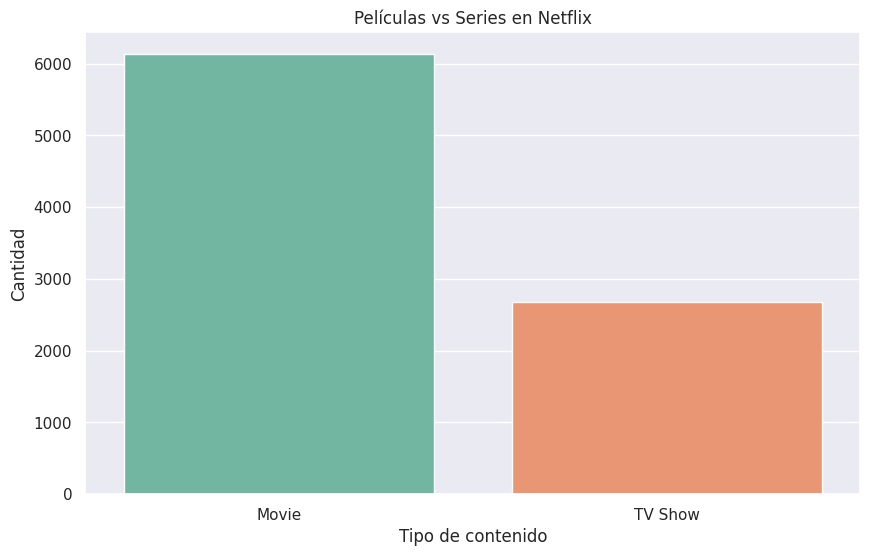

/tmp/ipython-input-11-2076613344.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_countries.index, x=top_countries.values, palette="viridis")


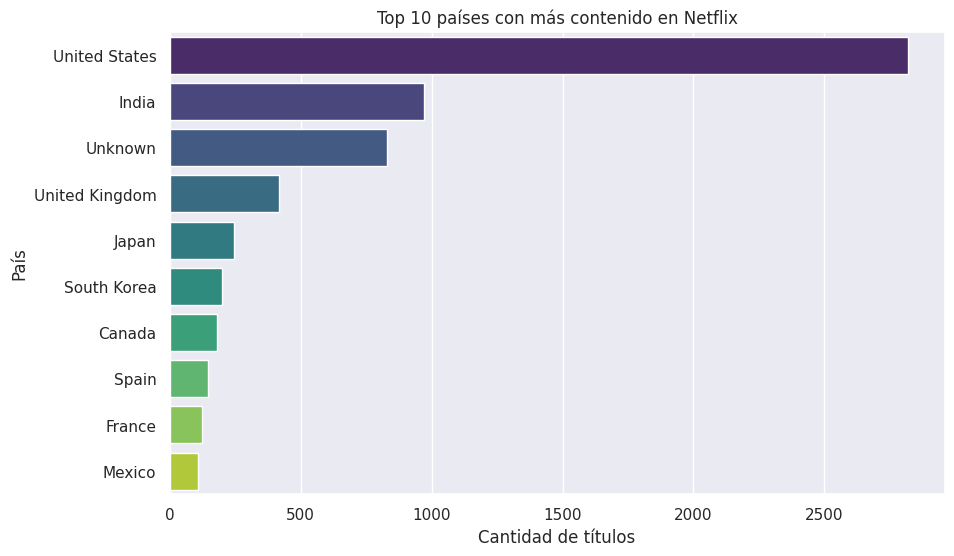

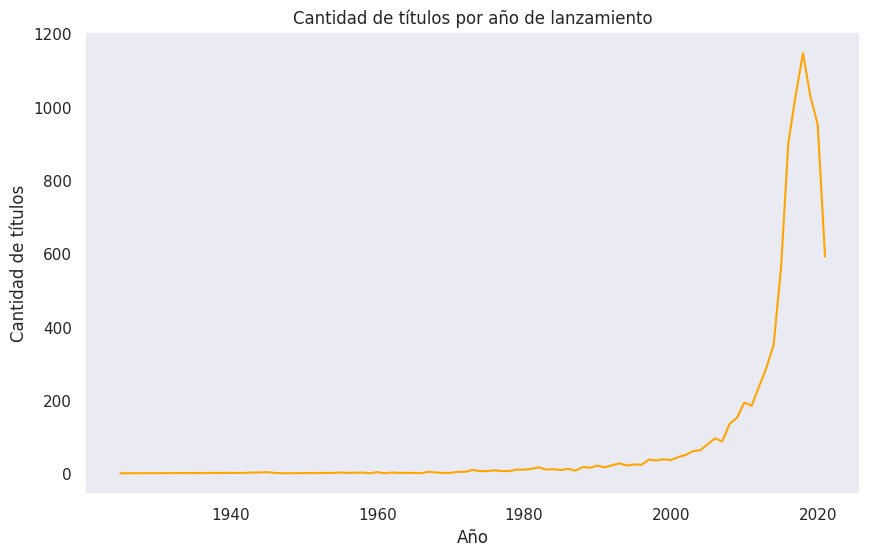

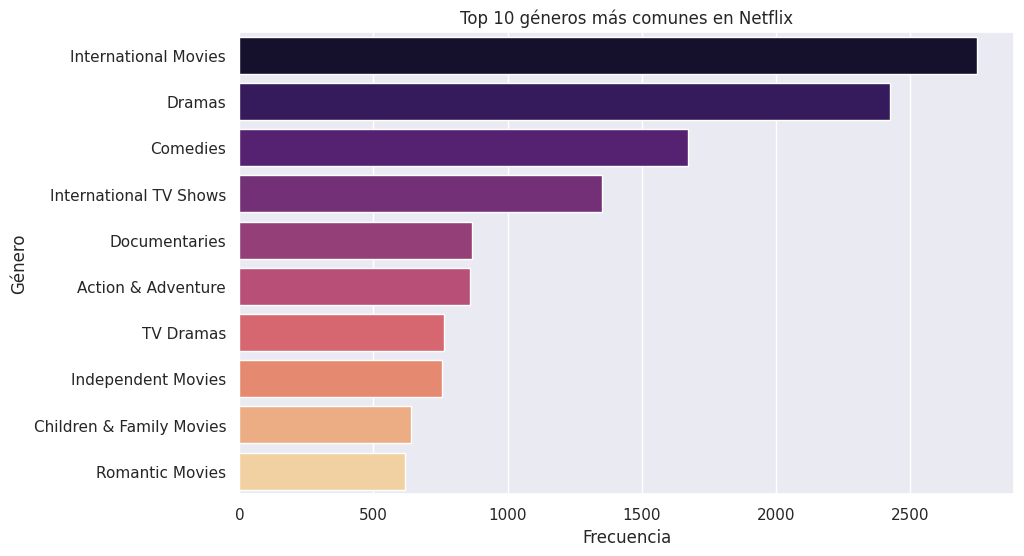

In [11]:
sns.countplot(data=df, x="type", palette="Set2")
plt.title("Pel√≠culas vs Series en Netflix")
plt.xlabel("Tipo de contenido")
plt.ylabel("Cantidad")
plt.show()
top_countries = df['country'].value_counts().head(10)
sns.barplot(y=top_countries.index, x=top_countries.values, palette="viridis")
plt.title("Top 10 pa√≠ses con m√°s contenido en Netflix")
plt.xlabel("Cantidad de t√≠tulos")
plt.ylabel("Pa√≠s")
plt.show()
df['release_year'].value_counts().sort_index().plot(kind="line", color='orange')
plt.title("Cantidad de t√≠tulos por a√±o de lanzamiento")
plt.xlabel("A√±o")
plt.ylabel("Cantidad de t√≠tulos")
plt.grid()
plt.show()
from collections import Counter

# Unir todos los g√©neros en una sola lista
all_genres = ",".join(df['listed_in'].dropna()).split(",")
top_genres = Counter([g.strip() for g in all_genres]).most_common(10)

# Crear DataFrame para graficar
genres_df = pd.DataFrame(top_genres, columns=["G√©nero", "Frecuencia"])
sns.barplot(data=genres_df, x="Frecuencia", y="G√©nero", hue="G√©nero", dodge=False, palette="magma", legend=False)


plt.title("Top 10 g√©neros m√°s comunes en Netflix")
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## üìò Conclusiones

- La mayor√≠a del contenido en Netflix corresponde a **pel√≠culas**.
- El pa√≠s con mayor cantidad de t√≠tulos es **Estados Unidos**, seguido por India y Reino Unido.
- Los a√±os con m√°s lanzamientos fueron **2018, 2019 y 2020**.
- Los g√©neros m√°s frecuentes son **drama, comedia, acci√≥n y documentales**.
- Netflix creci√≥ r√°pidamente en la segunda mitad de la d√©cada de 2010.

Este an√°lisis muestra c√≥mo se ha desarrollado el cat√°logo de Netflix en t√©rminos de tipo de contenido, producci√≥n global y diversidad tem√°tica.
